<h2 align="center"> Statistical Learning 1 </h2>
<h2 align="center"> Proyecto #2 </h2>

# Notebook #3
## Análisis de Modelos
** Marvin Diaz Carnet 9516008 **

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from scipy.stats import norm

In [35]:
df = pd.read_csv('C:/UCI HAR Dataset/Human_Activity_Recognition_Using_Smartphones_Data.csv')

## Transformación de Variable Predictiva
Se utilizo LabelEncoder para convertir las labels de Activity a integers, con esto se puede relacionar la variable a predecir.


In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Activity'] = le.fit_transform(df.Activity)
df['Activity'].sample(5)
### END SOLUTION

1435    4
4231    1
6855    1
3372    3
3304    1
Name: Activity, dtype: int32

## Separando la Data en Test y Train

In [9]:
# Calculando la correlacion de variables
feature_cols = df.columns[:-1]
corr_values = df[feature_cols].corr()


tril_index = np.tril_indices_from(corr_values)

# Haciendo los valores faltantes NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Convirtiendo la data a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Obteniendo valores absolutos
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

# Indices de separacion
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(df[feature_cols], df.Activity))

# Creando los dataframes
X_train = df.loc[train_idx, feature_cols]
y_train = df.loc[train_idx, 'Activity']

X_test  = df.loc[test_idx, feature_cols]
y_test  = df.loc[test_idx, 'Activity']

In [11]:
y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [12]:
y_test.value_counts(normalize=True)


0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

# Regresión Logistica

In [13]:
from sklearn.linear_model import LogisticRegression

# REgresion logistica
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [14]:
from sklearn.linear_model import LogisticRegressionCV

# L1 Regresion logistica regularizada
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [15]:
# L2 Regresion logistica regularizada
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)


*   Comparando la magnitud de los coeficientes para cada uno de los modelos. 

In [16]:
# Combinar los coeficientes a un dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

lr                                                          l1  \
            0         1         2         3         4         5         0   
467  0.002993  0.217266  0.308574  0.054700  0.098334  0.237068  0.000000   
549  0.134871 -1.306534  1.478447  0.255047  0.282069 -0.354369  0.000000   
219  0.024451 -0.113410 -0.022481 -0.621019 -0.027569 -0.490645  0.000000   
81  -0.025714 -0.133342  0.071428 -0.080978  0.044292 -0.202523  0.000000   
245 -0.020129  0.084135 -0.158133 -0.348243  0.212745 -0.018933  0.000000   
55  -1.260545  2.287108  1.111516  0.094611 -0.975173  0.948330 -3.349345   
78   0.125709 -0.057108 -0.000535  0.123442 -0.340251  0.224885  0.000000   
79  -0.141387  0.019343  0.006189 -0.193702  0.390725 -0.304583 -0.099450   
147 -0.129983 -1.146467  1.122597 -0.054408  0.361250 -0.441206  0.000000   
493  0.001605  0.220263  0.274081  0.133273  0.253586  0.267638  0.000000   

                                                             l2            \
            1         2         3         4         5         0         1   
467  0.444868  0.288052  0.072614  0.000000  0.227805 -0.015393  0.527925   
549 -3.085037  4.635855  0.521366  0.447211 -1.542963  0.318195 -5.517847   
219  0.000000  0.000000 -0.684324  0.000000 -0.687159  0.042324 -0.080316   
81   0.000000  0.000000  0.000000  0.053969 -0.630920 -0.050799 -1.813820   
245  0.000000  0.000000 -0.266923  0.351680  0.000000 -0.039755  0.332173   
55   3.259702  2.307449  0.000000 -3.291337  1.004223 -2.473193  2.878359   
78  -0.144005  0.000000  0.153800 -0.646908  0.523292  0.350567 -0.199276   
79   0.000000 -0.065511 -0.234506  0.524329 -0.805003  0.118011 -0.020612   
147  0.000000  0.000000  0.000000  0.000000 -2.611601 -0.290298  2.038250   
493  0.315724  0.489997  0.121645  0.398609  0.123822 -0.018180  0.448042   

                                             
            2         3         4         5  
467  0.427618 -0.054149  0.288340  0.234280  
549  2.565188  0.439207  0.529715 -1.069425  
219 -0.019160 -1.437535 -0.193968 -1.004554  
81   0.205014 -0.407655 -0.018429 -0.546569  
245 -0.290340 -0.753963  0.545235 -0.199476  
55   1.742269  0.212317 -1.856742  1.460618  
78  -0.031623  0.316007 -0.403523  0.334993  
79  -0.035518 -0.341141  0.670793 -0.674167  
147  1.319681 -0.282643  0.656109 -1.233966  
493  0.365899  0.383623  0.648394  0.180536

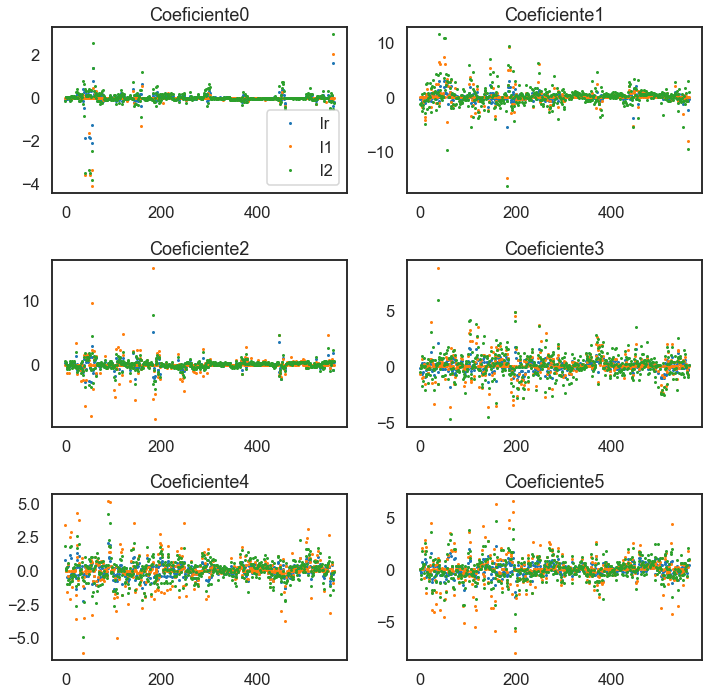

In [72]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coeficiente'+str(loc))

plt.tight_layout()


* Predecir y guardar la clase para cada modelo.
* Almacenar la probabilidad de la clase predicha para cada modelo.

In [18]:
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0


In [19]:
y_prob.head()

,lr,l1,l2
0,0.998939,0.998910,0.999757
1,0.988165,0.999462,0.999477
2,0.987592,0.995559,0.999671
3,0.981381,0.999137,0.994338
4,0.998277,0.999918,0.999997


Para cada modelo, se calcularon las siguientes metricas:

*   Exactitud
*   Precision
*   Recall
*   F-score
*   Matriz de confusion

In [20]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Exactitud, recall, f-score de la funcion multi-class
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
       
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC resultados pueden ser calculados convirtiendo la data en binaria
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Matriz de confusion
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [21]:
metrics

,lr,l1,l2
precision,0.984144,0.983835,0.983824
recall,0.984142,0.983819,0.983819
fscore,0.984143,0.983815,0.983819
accuracy,0.984142,0.983819,0.983819
auc,0.990384,0.990144,0.990165


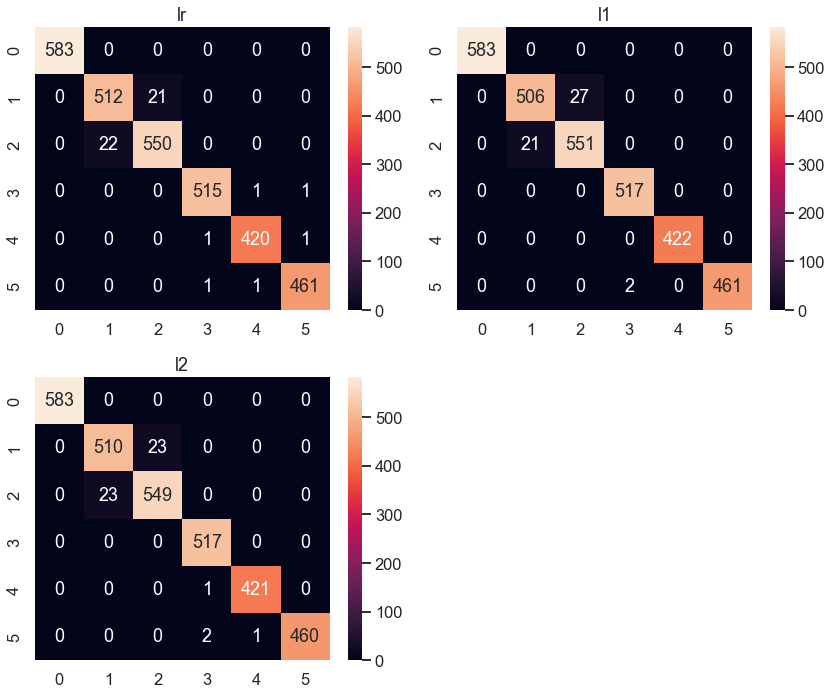

In [22]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()


# SVM (Support Vector Machines)

In [32]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [33]:
yhat = clf.predict(X_test)
yhat [0:5]

array([3, 5, 3, 1, 0])

## Evaluación

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       583
           1       0.93      0.94      0.94       533
           2       0.95      0.94      0.94       572
           3       1.00      1.00      1.00       517
           4       0.99      0.99      0.99       422
           5       0.99      0.99      0.99       463

    accuracy                           0.97      3090
   macro avg       0.98      0.98      0.98      3090
weighted avg       0.97      0.97      0.97      3090

Confusion matrix, without normalization
[[535   0]
 [  0 418]]


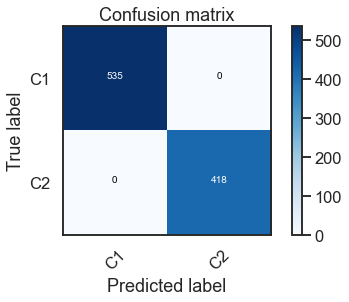

In [37]:
# Matriz de confusion
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Matriz de confusion no normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['C1','C2'],normalize= False,  title='Confusion matrix')

In [38]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9747434952030193

# Boosting

The data has quite a few predictor columns.

In [41]:
df.shape

(10299, 562)

In [42]:
df.dtypes.value_counts()

float64    561
int32        1
dtype: int64

In [12]:
# Seleccionando las columnas con datos tipo float
float_columns = (df.dtypes == np.float)

# Verificando que el valor maximo de las columnas flot es 1.0
print( (df.loc[:,float_columns].max()==1.0).all() )

# Verificando que el valor maximo de las columnas flot es -1.0
print( (df.loc[:,float_columns].min()==-1.0).all() )

True
True


C:\Users\Marvin\AppData\Local\Temp/ipykernel_84164/383373843.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  float_columns = (df.dtypes == np.float)


Utilizando Label Encoder para coficar la variable Activity como integers y no como strings

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Activity'] = le.fit_transform(df['Activity'])

le.classes_

array([0, 1, 2, 3, 4, 5])

In [38]:
le.classes_

array([0, 1, 2, 3, 4, 5])

In [39]:
df.Activity.unique()

array([2, 1, 0, 3, 4, 5], dtype=int64)

In [41]:
df.Activity.value_counts(normalize=True)

0    0.188756
2    0.185067
1    0.172541
3    0.167201
5    0.149917
4    0.136518
Name: Activity, dtype: float64

Spliting la data en train y test sets.

In [42]:
from sklearn.model_selection import train_test_split

feature_columns = [x for x in df.columns if x != 'Activity']

X_train, X_test, y_train, y_test = train_test_split(df[feature_columns], df['Activity'],
                 test_size=0.3, random_state=42)

In [43]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7209, 561), (7209,), (3090, 561), (3090,))

* Modelando el gradiente boosted tree con todos los parametros utilizando los estimadores [15, 25, 50, 100, 200, 400] y evaluando la exactitud de la data test para cada uno de los modelos.
*   Graficar la exactitud de los estimadoresPlot the accuracy as a function of estimator number.


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

error_list = list()

# Iteracion diferentes posibilidades de numero de arboles
tree_list = [15, 25, 50, 100, 200, 400]
for n_trees in tree_list:
    
    # Inicializando el gradient boost classifier
    GBC = GradientBoostingClassifier(max_features = 5, random_state=42)

    print(f'Fitting model with {n_trees} trees')
    GBC.fit(X_train.values, y_train.values)
    y_pred = GBC.predict(X_test)

    # Obteniendo el error
    error = 1.0 - accuracy_score(y_test, y_pred)
    
    error_list.append(pd.Series({'n_trees': n_trees, 'error': error}))

error_df = pd.concat(error_list, axis=1).T.set_index('n_trees')

error_df

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

error_list = list()

# Iteracion diferentes posibilidades de numero de arboles
tree_list = [15, 25, 50, 100, 200, 400]
for n_trees in tree_list:
    
    # Inicializando el gradient boost classifier
    GBC = GradientBoostingClassifier(n_estimators=n_trees, random_state=42)

    print(f'Fitting model with {n_trees} trees')
    GBC.fit(X_train.values, y_train.values)
    y_pred = GBC.predict(X_test)

    # Obteniendo el error
    error = 1.0 - accuracy_score(y_test, y_pred)
    
    error_list.append(pd.Series({'n_trees': n_trees, 'error': error}))

error_df = pd.concat(error_list, axis=1).T.set_index('n_trees')

error_df

Fitting model with 15 trees
Fitting model with 25 trees
Fitting model with 50 trees
Fitting model with 100 trees
Fitting model with 200 trees
Fitting model with 400 trees


,error
n_trees,
15.0,0.051133
25.0,0.033981
50.0,0.019417
100.0,0.013592
200.0,0.011003
400.0,0.010356


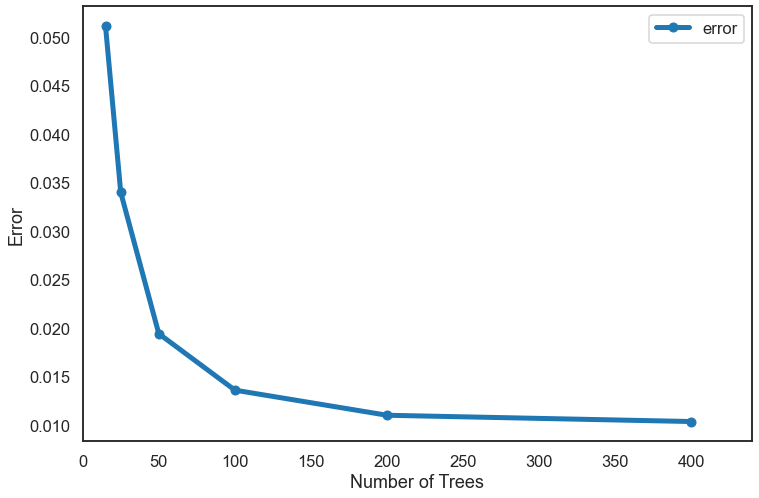

In [52]:
sns.set_context('talk')
sns.set_style('white')

# GRaficando
ax = error_df.plot(marker='o', figsize=(12, 8), linewidth=5)

# EStableciendo los parametros
ax.set(xlabel='Number of Trees', ylabel='Error')
ax.set_xlim(0, max(error_df.index)*1.1);


*   Using a grid search with cross-validation, fit a new gradient boosted classifier with the same list of estimators as question 3. Also try varying the learning rates (0.1, 0.01, 0.001, etc.), the subsampling value (1.0 or 0.5), and the number of maximum features (1, 2, etc.).
*   Examine the parameters of the best fit model.
*   Calculate relevant error metrics on this model and examine the confusion matrix.

* Ajustando un nuevo clasificador aumentado por gradiente con la misma lista de estimadores. VAriando las tasas de aprendizaje (0.1, 0.01, 0.001, etc.), el valor de submuestreo (1.0 o 0.5) y el número de características máximas (1, 2, 3, 4).
* Determinando los parámetros del modelo de mejor ajuste.


In [53]:
from sklearn.model_selection import GridSearchCV

# Parametros para fit
param_grid = {'n_estimators': tree_list,
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5],
              'max_features': [1, 2, 3, 4]}

# La busqueda del grid
GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

GV_GBC = GV_GBC.fit(X_train, y_train)

In [78]:
# El mejor modelo
GV_GBC.best_estimator_

GradientBoostingClassifier(max_features=4, n_estimators=400, random_state=42,
                           subsample=0.5)

In [79]:
from sklearn.metrics import classification_report

y_pred = GV_GBC.predict(X_test)
print(classification_report(y_pred, y_test))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

La matriz de confusion.  El modelo gradient boosted no distingue muy bien entre la activity class 1 and 2.

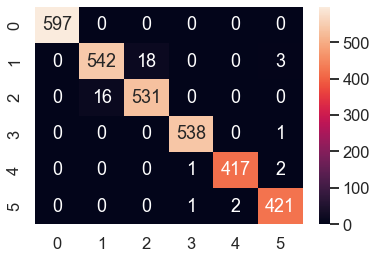

In [56]:
from sklearn.metrics import confusion_matrix

sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')


*   Comparando los errores de AdaBoost con los del GradientBoostedClassifier.

In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))

param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.001]}

GV_ABC = GridSearchCV(ABC,
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

GV_ABC = GV_ABC.fit(X_train, y_train)

NameError: name 'GridSearchCV' is not defined

In [58]:
GV_ABC.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=100)

Para Activity 3 a 5 AdaBoost no reconoce outliers

In [13]:
y_pred = GV_ABC.predict(X_test)
print(classification_report(y_pred, y_test))

NameError: name 'GV_ABC' is not defined

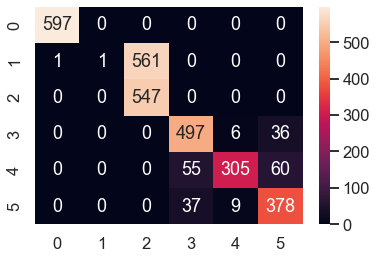

In [66]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')


In [23]:
y_pred

NameError: name 'y_pred' is not defined

<function id(obj, /)>

In [24]:
df1 = pd.DataFrame(df1, columns= ['y_pred'])

df1.to_csv (r'C:\UCI HAR Dataset\export_dataframe.csv', index = False, header=True)

print (df1)

       y_pred
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
...       ...
10294     NaN
10295     NaN
10296     NaN
10297     NaN
10298     NaN

[10299 rows x 1 columns]
